In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('DataSets/smartphone_cleaned_v5.csv')

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [6]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'resolution', 'num_rear_cameras', 'num_front_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto'],
      dtype='object')

In [7]:
df.shape

(980, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [10]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [11]:
df1 = df.copy()

In [14]:
df.sample(5)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
566,oppo,Oppo A56s,12999,75.0,True,False,False,dimensity,8.0,2.40,5000.0,0,NaN,8.0,128.0,6.56,60,720 x 1612,2,1.0,android,13.0,8.0,1,NaN
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,4.0,1.40,2800.0,0,NaN,2.0,64.0,5.00,60,720 x 1280,1,1.0,android,5.0,2.0,1,128.0
61,vivo,Vivo S16,29990,85.0,True,True,False,snapdragon,8.0,3.20,4600.0,1,66.0,8.0,128.0,6.78,120,1080 x 2400,3,1.0,android,64.0,50.0,0,NaN
941,xiaomi,Xiaomi Redmi 9A (6GB RAM + 128GB),10990,69.0,False,False,False,helio,8.0,2.00,5000.0,0,NaN,6.0,128.0,6.53,60,720 x 1600,1,1.0,android,13.0,5.0,1,512.0
788,apple,Apple iPhone 14 Plus (512GB),104999,83.0,True,True,False,bionic,6.0,3.22,4325.0,1,NaN,6.0,512.0,6.70,60,1284 x 2778,2,1.0,ios,12.0,12.0,0,NaN


In [ ]:
#brand_name

In [15]:
df['brand_name'].value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: brand_name, dtype: int64

In [ ]:
#Plot a graph of top brands

<AxesSubplot: >

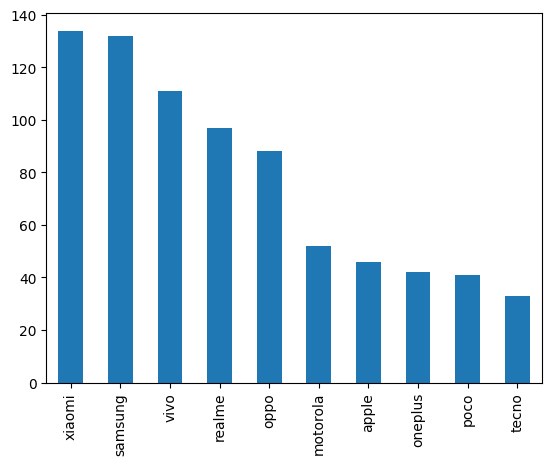

In [17]:
df['brand_name'].value_counts().head(10).plot(kind='bar')

<AxesSubplot: ylabel='brand_name'>

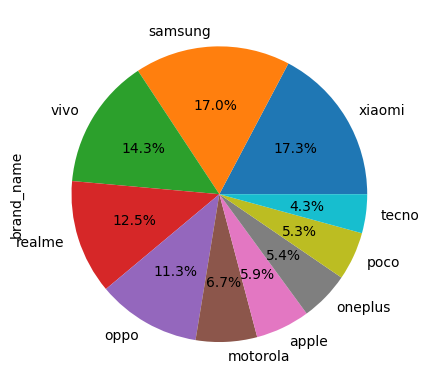

In [18]:
df['brand_name'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

In [19]:
df['brand_name'].isnull().sum()

0

In [ ]:
#model

In [23]:
df['model'].unique

<bound method Series.unique of 0                                          OnePlus 11 5G
1                              OnePlus Nord CE 2 Lite 5G
2                                  Samsung Galaxy A14 5G
3                                   Motorola Moto G62 5G
4                                     Realme 10 Pro Plus
5                Samsung Galaxy F23 5G (6GB RAM + 128GB)
6                                        Apple iPhone 14
7                          Xiaomi Redmi Note 12 Pro Plus
8                                        Nothing Phone 1
9                                     OnePlus Nord 2T 5G
10                                         Realme 10 Pro
11                                              Oppo A78
12                           Xiaomi Redmi Note 12 Pro 5G
13                          Vivo T1 5G (6GB RAM + 128GB)
14                           Samsung Galaxy S23 Ultra 5G
15                                       Apple iPhone 13
16                                              Vivo Y16


In [24]:
df['price'].isnull().sum()

0

In [ ]:
#price

In [26]:
df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

#distribution is not normal
#Data is skewed

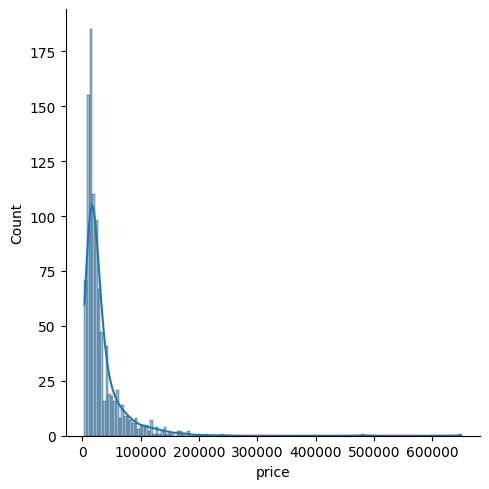

In [27]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [28]:
df['price'].skew()

6.591790999665567

<AxesSubplot: >

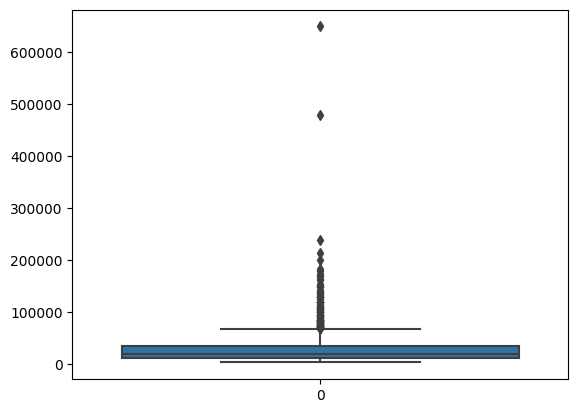

In [29]:
sns.boxplot(df['price'])

In [30]:
df[df['price']>250000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.50,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,1212 x 2616,3,1.0,other,50.0,13.0,1,256.0
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.80,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN
951,huawei,Huawei Mate 30 RS Porsche Design,214990,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,NaN,12.0,512.0,6.53,60,1176 x 2400,4,2.0,android,40.0,32.0,1,256.0


In [31]:
df[df['price']>250000]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
427,vertu,Vertu Signature Touch,650000,62.0,False,True,False,snapdragon,8.0,1.5,2275.0,0,NaN,2.0,64.0,4.70,60,1080 x 1920,1,1.0,android,13.0,2.1,0,NaN
887,xiaomi,Xiaomi Redmi K20 Pro Signature Edition,480000,88.0,False,True,False,snapdragon,8.0,2.8,4000.0,1,27.0,8.0,256.0,6.39,60,1080 x 2340,3,1.0,android,48.0,20.0,0,NaN


In [32]:
df['price'].isnull().sum()

0

In [ ]:
#Rating

In [33]:
df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

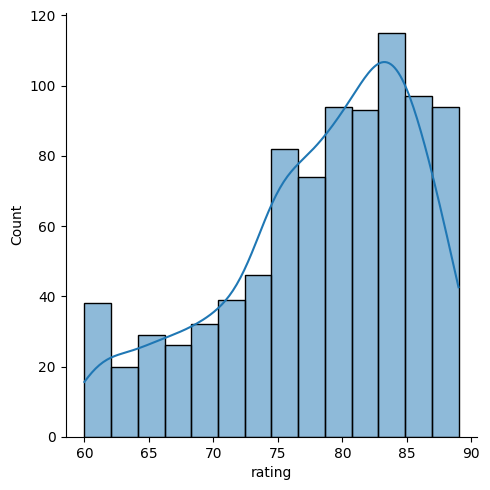

In [36]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [37]:
df['rating'].skew()

-0.6989993034105535

<AxesSubplot: >

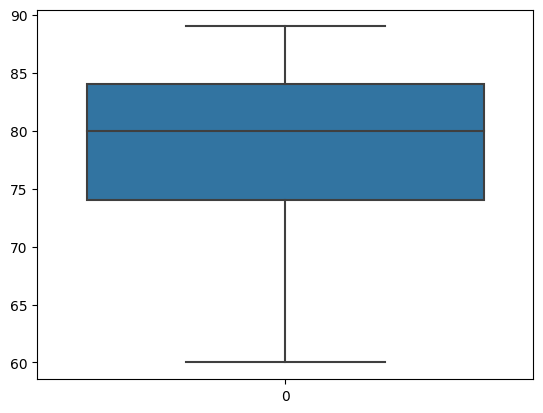

In [35]:
sns.boxplot(df['rating'])

In [38]:
df['rating'].isnull().sum()

101

In [ ]:
#has_5g

<AxesSubplot: ylabel='has_5g'>

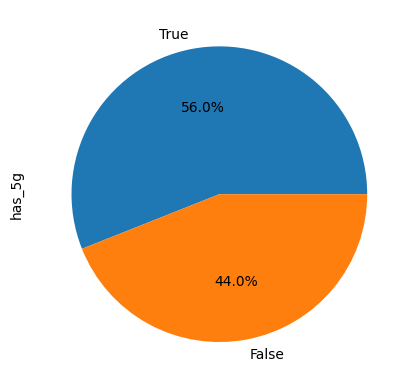

In [41]:
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot: ylabel='has_nfc'>

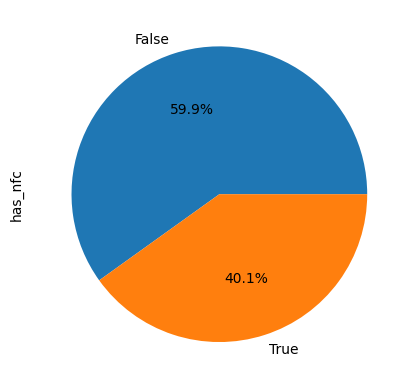

In [43]:
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<AxesSubplot: ylabel='has_ir_blaster'>

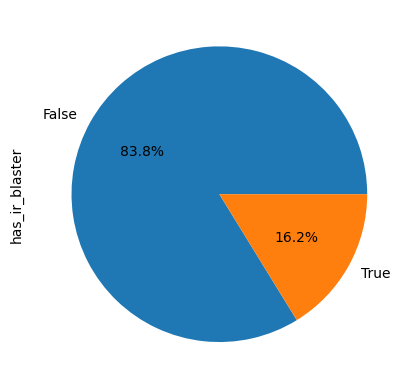

In [44]:
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [45]:
df[df['has_ir_blaster'] ==True]['brand_name'].value_counts()

xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: brand_name, dtype: int64

chinese phones provide ir_blaster...

In [46]:
df['processor_brand'].value_counts()

snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

<AxesSubplot: ylabel='processor_brand'>

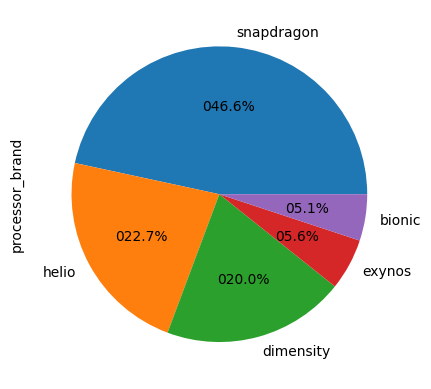

In [48]:
df['processor_brand'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='num_cores'>

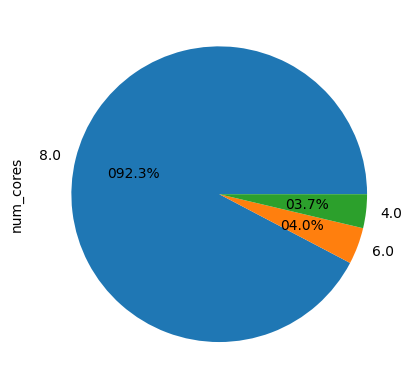

In [49]:
df['num_cores'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='fast_charging'>

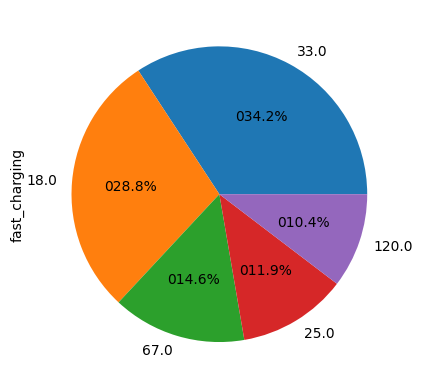

In [51]:
df['fast_charging'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='ram_capacity'>

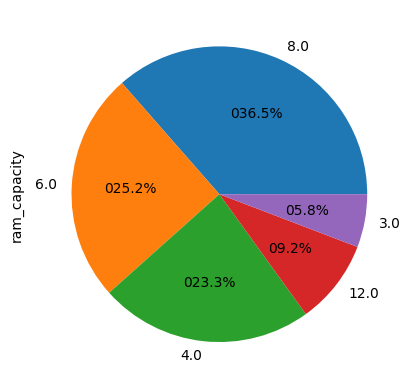

In [52]:
df['ram_capacity'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='internal_memory'>

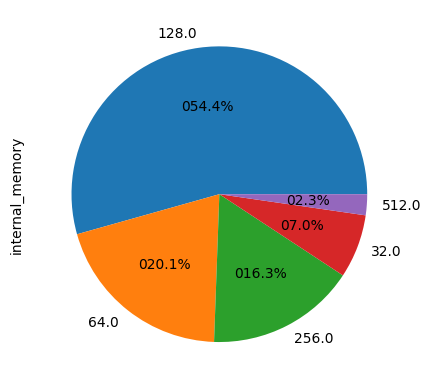

In [54]:
df['internal_memory'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='refresh_rate'>

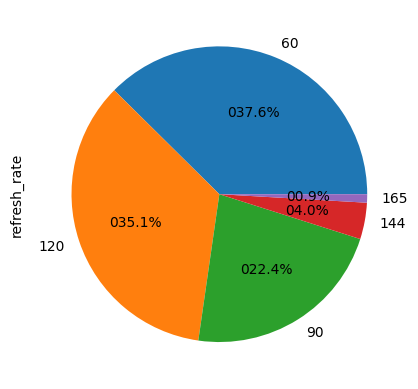

In [55]:
df['refresh_rate'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

In [56]:
df['refresh_rate'].value_counts()

60     368
120    344
90     219
144     39
165      9
240      1
Name: refresh_rate, dtype: int64

<AxesSubplot: >

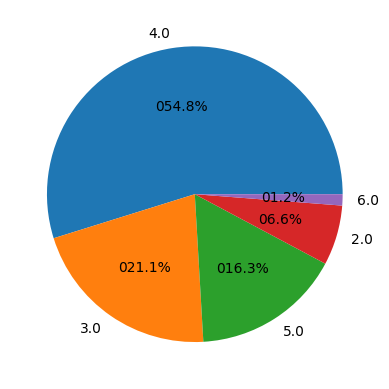

In [61]:
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='os'>

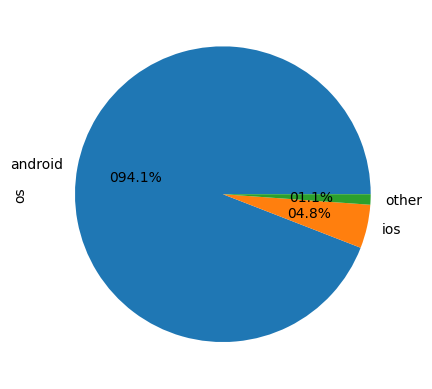

In [60]:
df['os'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

In [ ]:
#Extended memory available

<AxesSubplot: ylabel='extended_memory_available'>

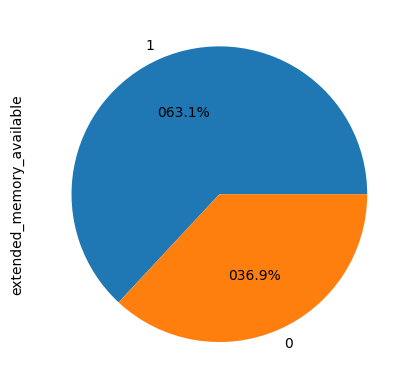

In [62]:
df['extended_memory_available'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

<AxesSubplot: ylabel='extended_upto'>

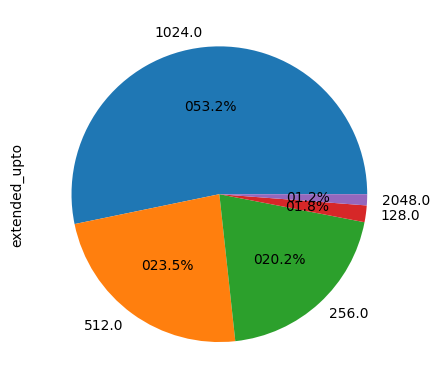

In [63]:
df['extended_upto'].value_counts().head().plot(kind='pie',autopct='0%.1f%%')

In [72]:
def plot_graphs(column_name):
    sns.displot(kind='hist',kde=True,data=df,x=column_name,label=column_name)
    sns.catplot(kind = 'box', data=df,x=column_name)

In [73]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

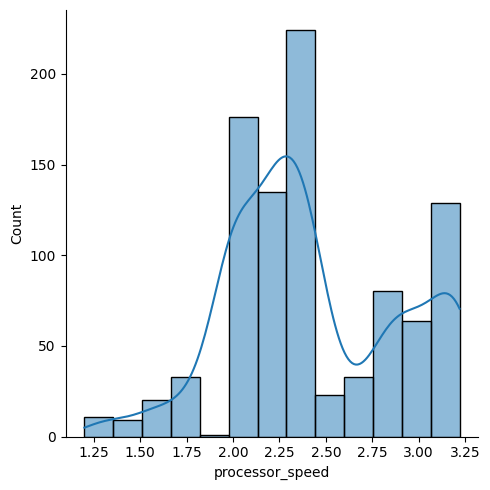

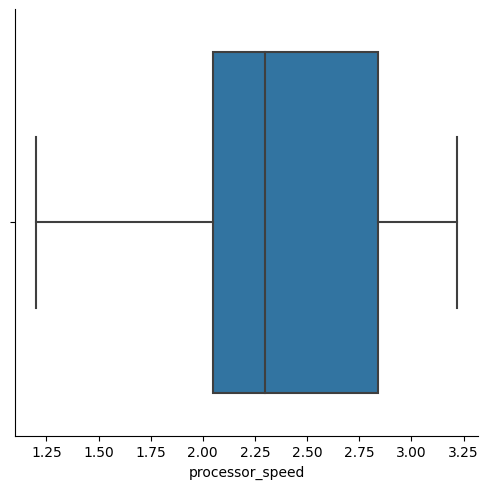

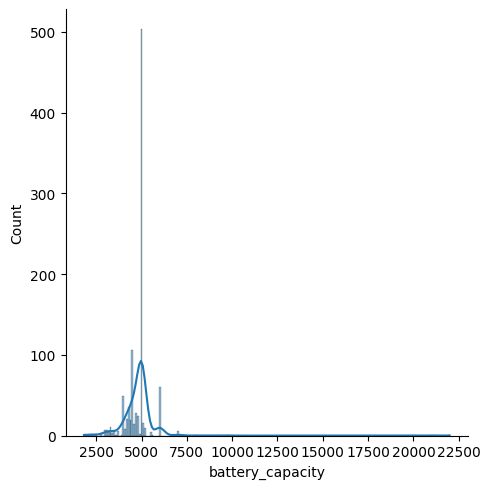

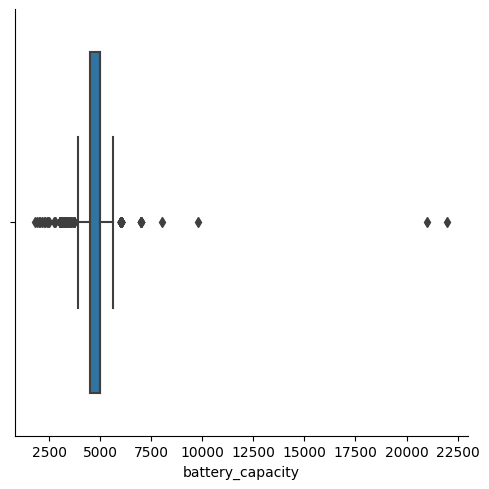

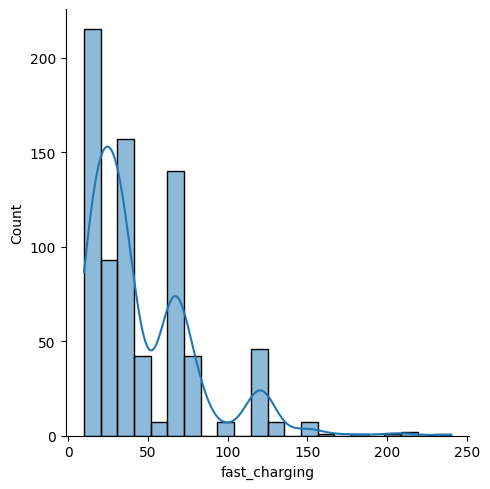

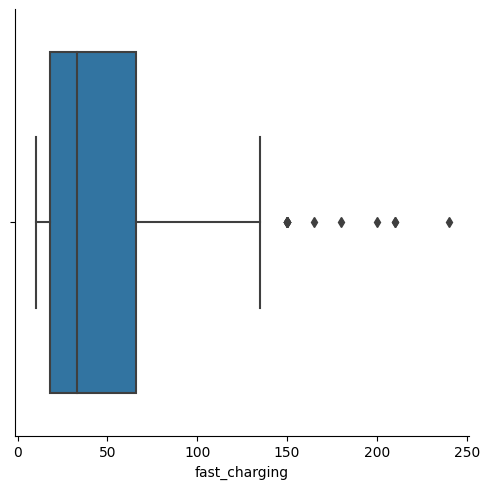

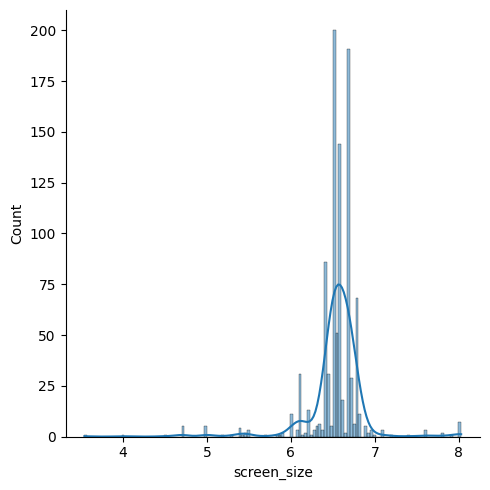

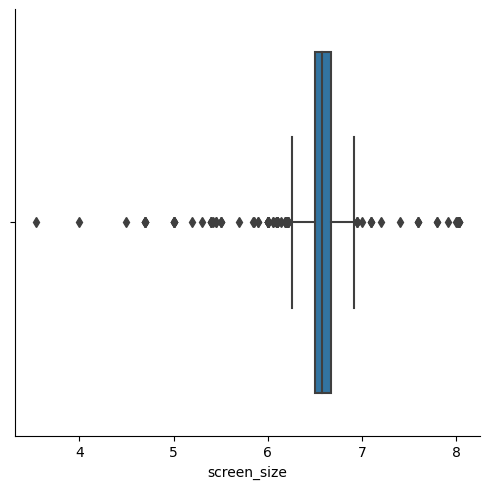

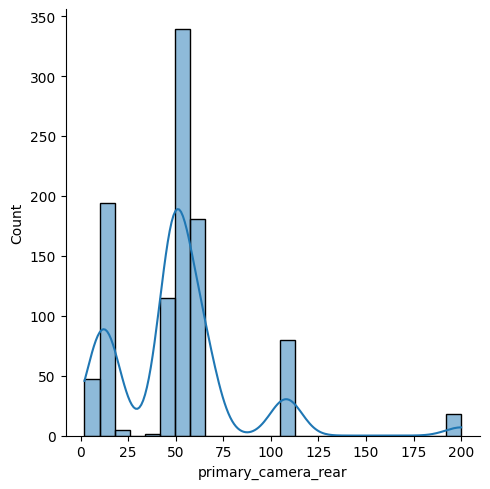

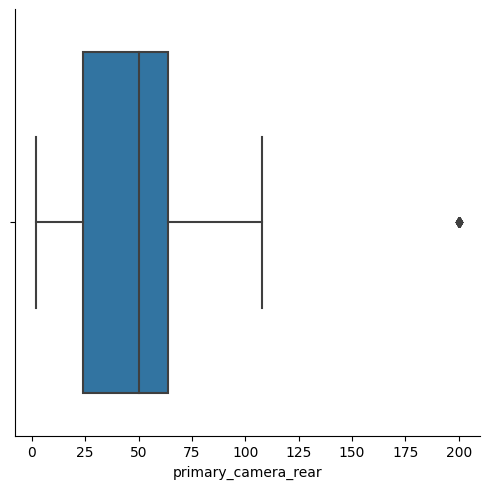

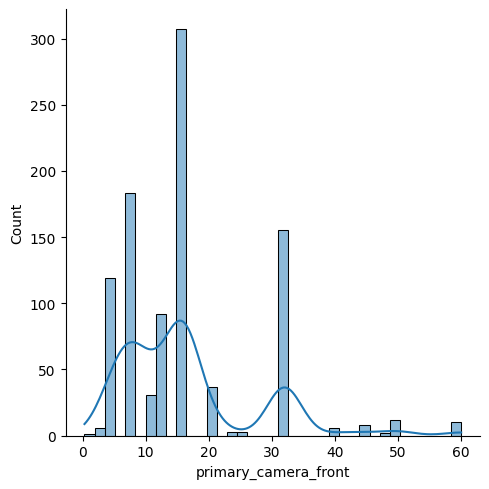

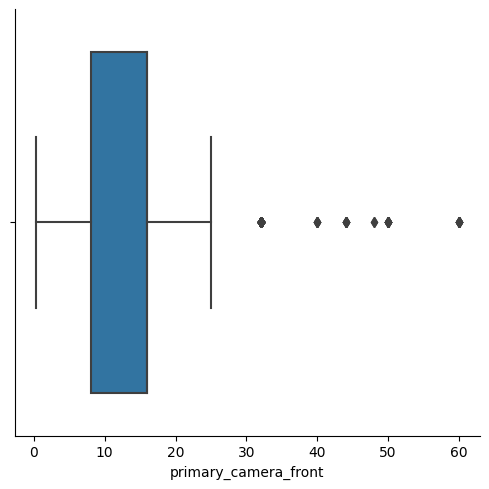

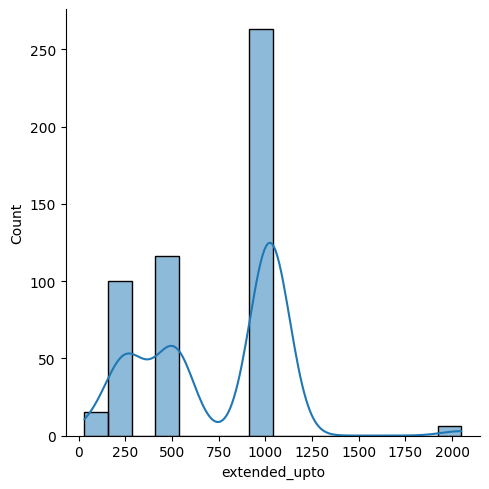

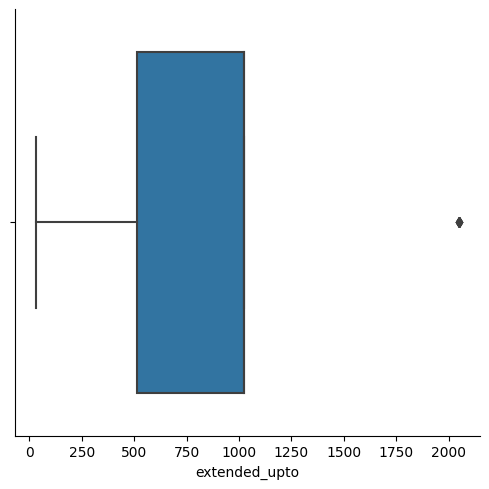

In [74]:
for col in num_columns:
    plot_graphs(col)

In [84]:
#df.groupby('brand_name')['battery_capacity'].value_counts().plot(kind='hist')

In [ ]:
#bivariate analysis

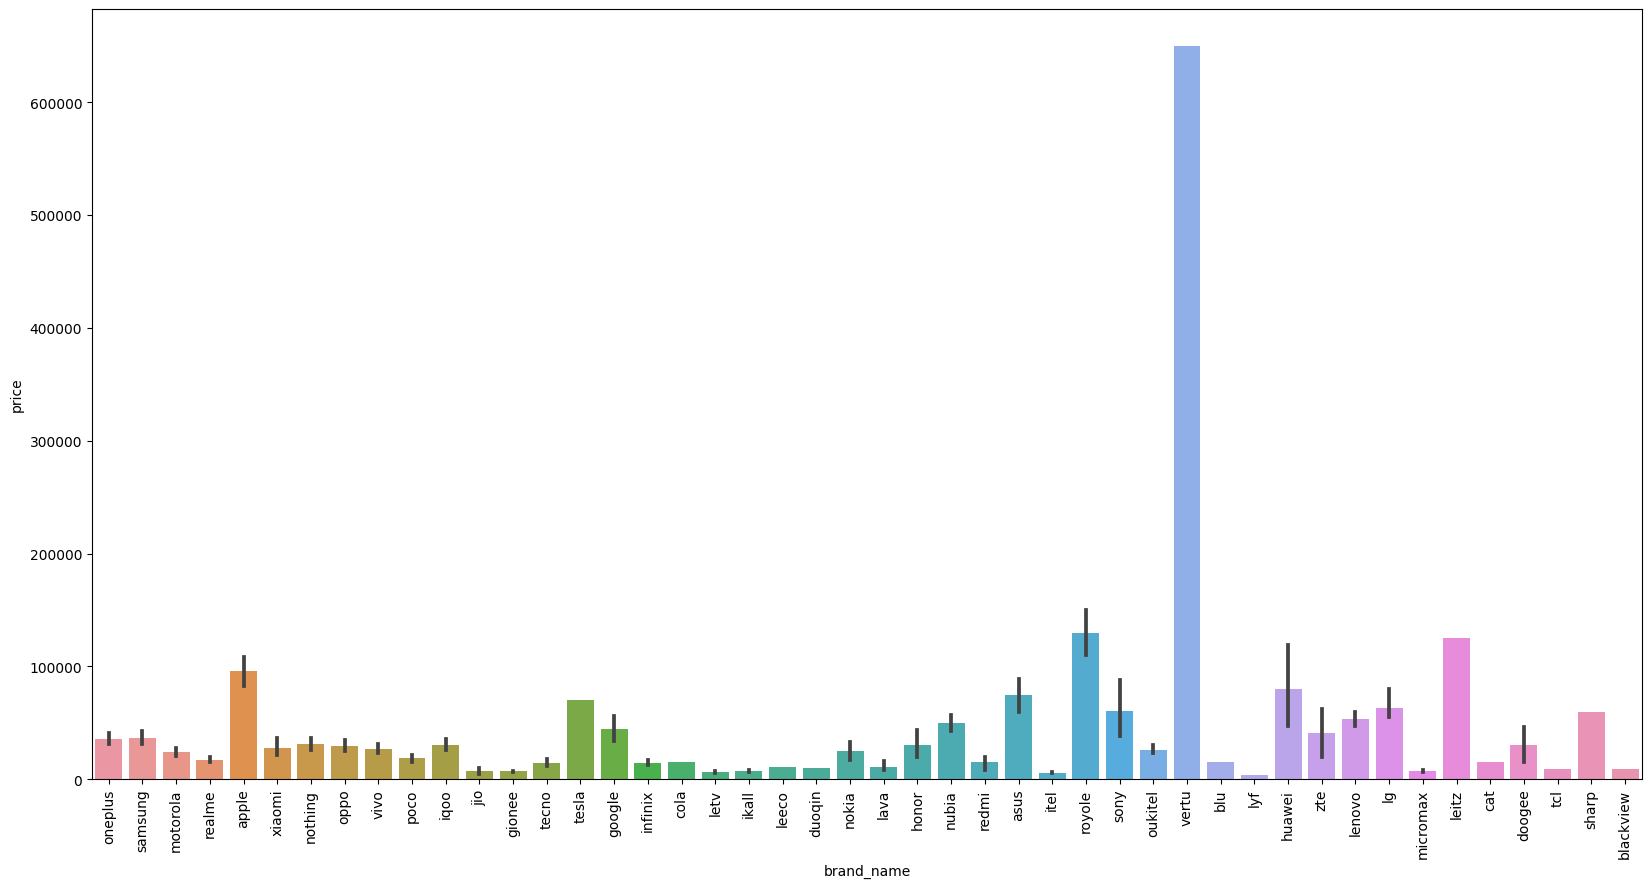

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='brand_name',y='price')
plt.xticks(rotation='vertical')
plt.show()

In [89]:
x = df.groupby('brand_name').count()['model']

In [90]:
x[x > 10].index

Index(['apple', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'motorola',
       'nokia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [91]:
temp_df = df[df['brand_name'].isin(x[x > 10].index)]

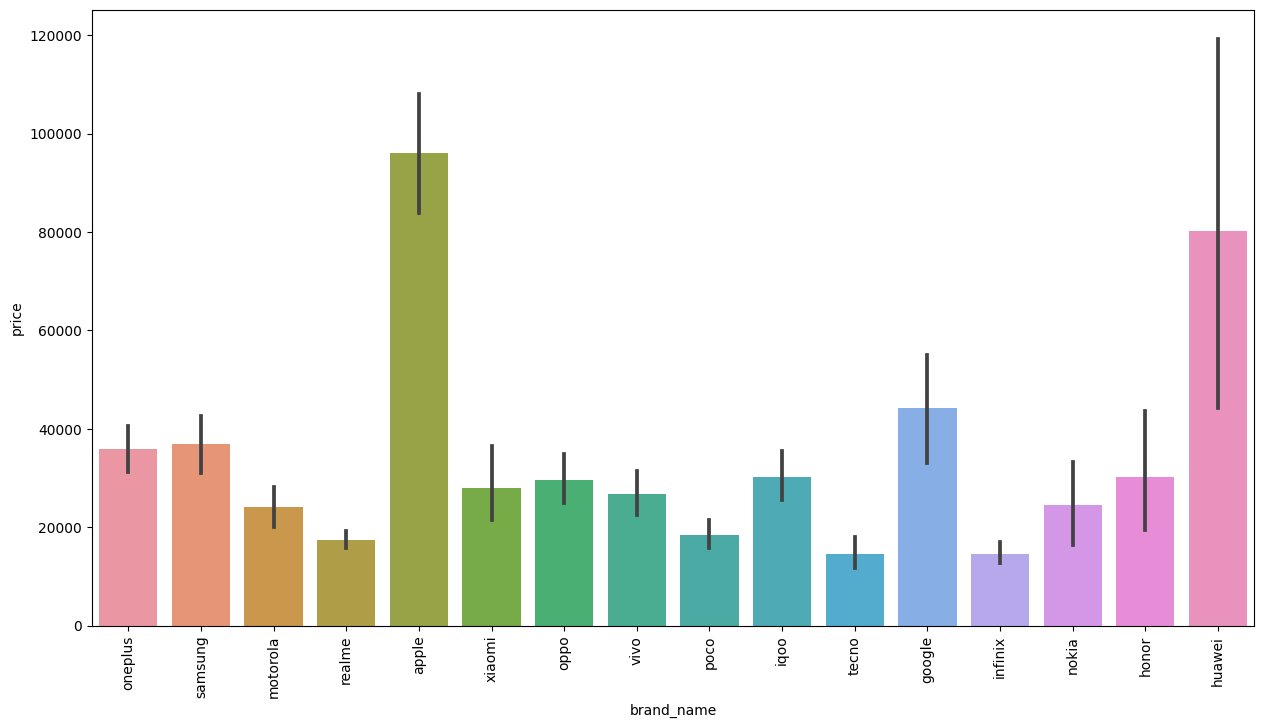

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df,x='brand_name',y='price')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='rating', ylabel='price'>

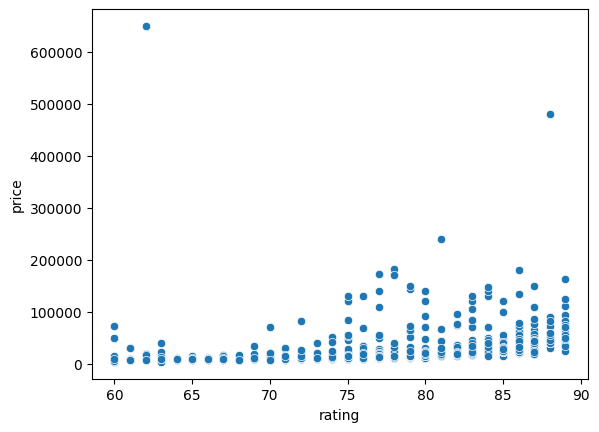

In [95]:
sns.scatterplot(data=df,x='rating',y='price')

<AxesSubplot: xlabel='has_5g', ylabel='price'>

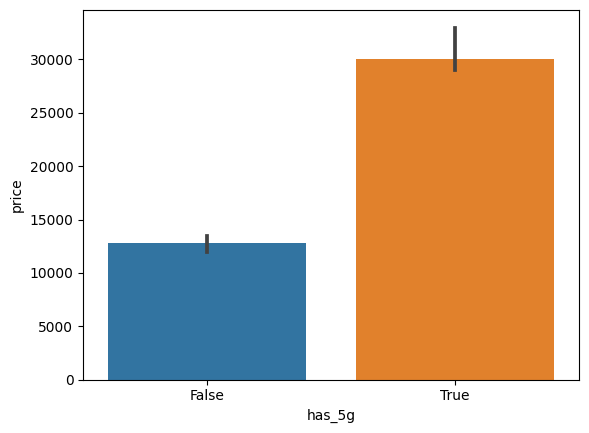

In [97]:
sns.barplot(data=df,x='has_5g',y='price',estimator=np.median)

<AxesSubplot: xlabel='has_nfc', ylabel='price'>

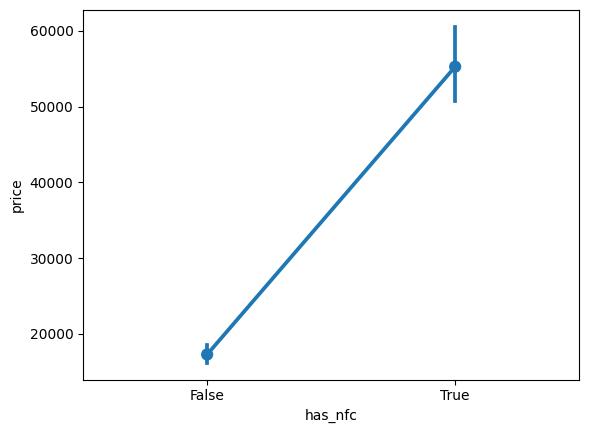

In [99]:
sns.pointplot(data=df,x='has_nfc',y='price')

<AxesSubplot: xlabel='has_ir_blaster', ylabel='price'>

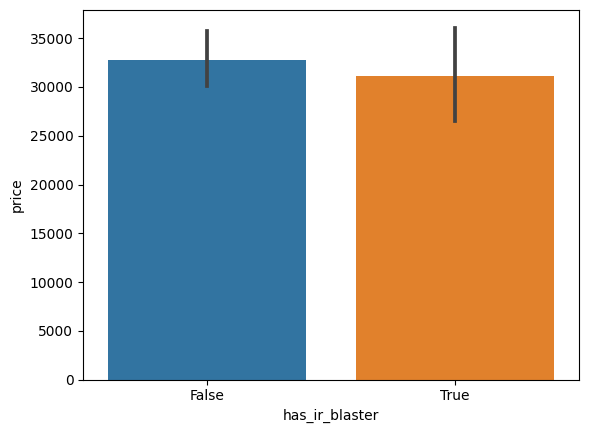

In [101]:
sns.barplot(data=df,x='has_ir_blaster',y='price')

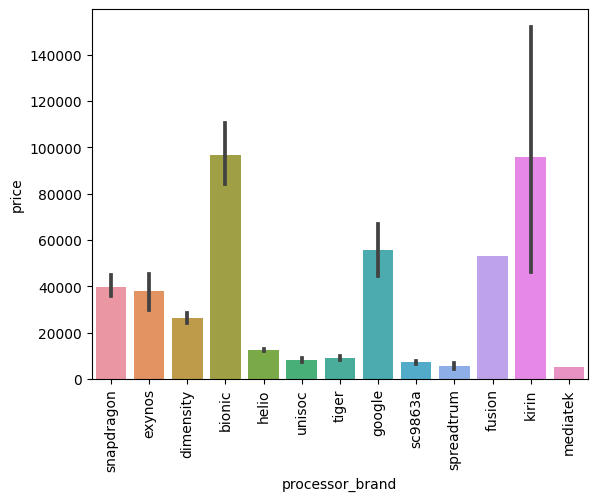

In [105]:
sns.barplot(data=df,x='processor_brand',y='price')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='num_cores', ylabel='price'>

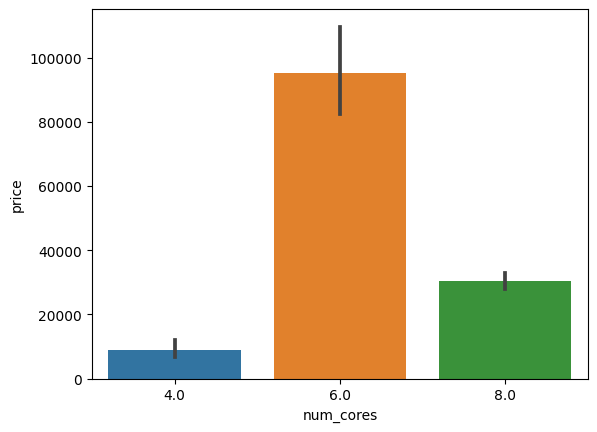

In [106]:
sns.barplot(data=df,x='num_cores',y='price')

In [107]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<AxesSubplot: xlabel='processor_speed', ylabel='price'>

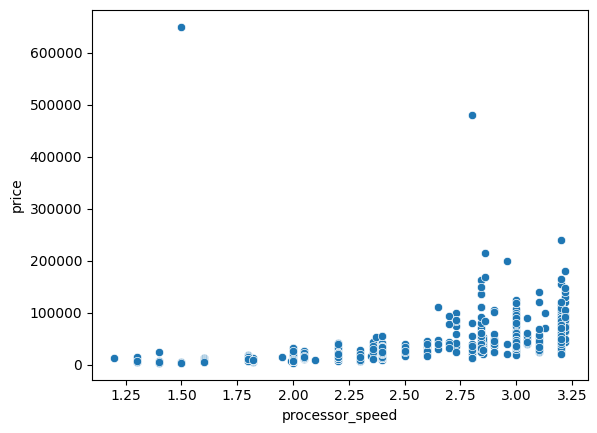

In [108]:
sns.scatterplot(data=df,x='processor_speed',y='price')

<AxesSubplot: xlabel='screen_size', ylabel='price'>

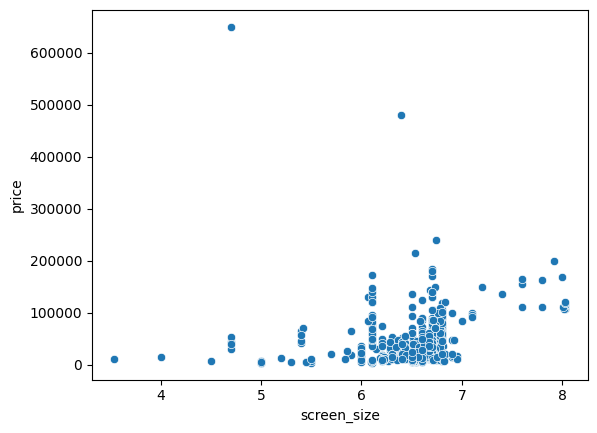

In [109]:
sns.scatterplot(data=df,x='screen_size',y='price')

/tmp/ipykernel_1348/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

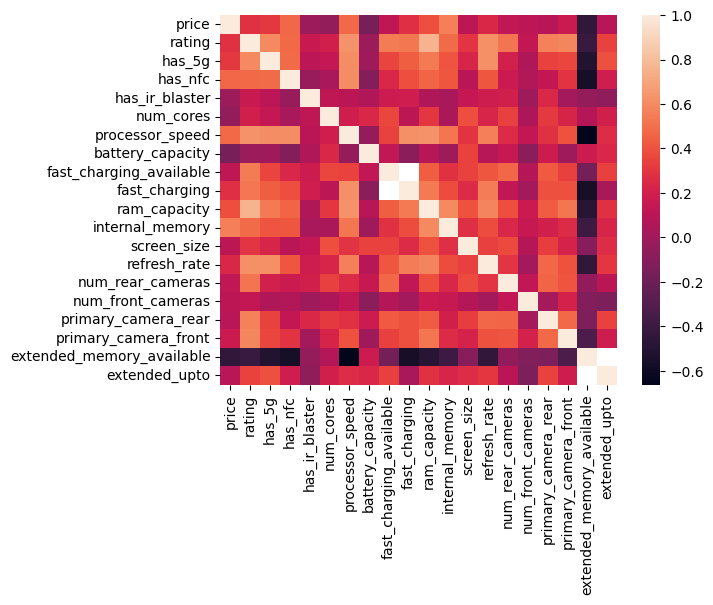

In [111]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='rating', ylabel='ram_capacity'>

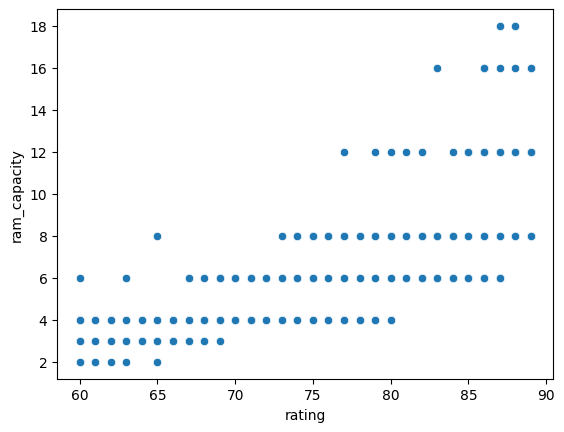

In [112]:
sns.scatterplot(data=df,x='rating',y='ram_capacity')

In [113]:
df.corr()['price']

/tmp/ipykernel_1348/441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.277591
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

In [114]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [115]:
df.corr()['rating']

/tmp/ipykernel_1348/2193793502.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['rating']


price                        0.283504
rating                       1.000000
has_5g                       0.596087
has_nfc                      0.474754
has_ir_blaster               0.156421
num_cores                    0.199741
processor_speed              0.628446
battery_capacity            -0.015581
fast_charging_available      0.542814
fast_charging                0.527613
ram_capacity                 0.757613
internal_memory              0.481070
screen_size                  0.298272
refresh_rate                 0.610795
num_rear_cameras             0.515531
num_front_cameras            0.131480
primary_camera_rear          0.562046
primary_camera_front         0.577861
extended_memory_available   -0.415265
extended_upto                0.346761
Name: rating, dtype: float64

In [116]:
# knn imputer
df.shape

(980, 25)

In [120]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [121]:
from sklearn.impute import KNNImputer

In [122]:
imputer = KNNImputer(n_neighbors=5)


In [123]:
x_df_values = imputer.fit_transform(x_df)

In [125]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [126]:
x_df['price'] = df['price']

In [127]:
x_df.head()

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,price
0,89.0,8.0,3.2,5000.0,1.0,100.0,12.0,256.0,6.70,120.0,3.0,1.0,50.0,16.0,0.0,870.4,54999
1,81.0,8.0,2.2,5000.0,1.0,33.0,6.0,128.0,6.59,120.0,3.0,1.0,64.0,16.0,1.0,1024.0,19989
2,75.0,8.0,2.4,5000.0,1.0,15.0,4.0,64.0,6.60,90.0,3.0,1.0,50.0,13.0,1.0,1024.0,16499
3,81.0,8.0,2.2,5000.0,1.0,29.2,6.0,128.0,6.55,120.0,3.0,1.0,50.0,16.0,1.0,1024.0,14999
4,82.0,8.0,2.6,5000.0,1.0,67.0,6.0,128.0,6.70,120.0,3.0,1.0,108.0,16.0,0.0,1024.0,24999


In [128]:
a = x_df.corr()['price'].reset_index()

In [129]:
b = df.corr()['price'].reset_index()

/tmp/ipykernel_1348/3768104801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b = df.corr()['price'].reset_index()


In [130]:
b.merge(a,on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.283504,0.341727
2,num_cores,-0.048561,-0.055949
3,processor_speed,0.474049,0.488426
4,battery_capacity,-0.159232,-0.166257
5,fast_charging_available,0.116739,0.116739
6,fast_charging,0.277591,0.220688
7,ram_capacity,0.386002,0.386002
8,internal_memory,0.557168,0.557168
9,screen_size,0.113253,0.113253


In [132]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [133]:
from sklearn.preprocessing import OneHotEncoder

In [134]:
ohe = OneHotEncoder()

In [ ]:
ohe.fit_transform(df['brand_name'])

In [138]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).head()

,model,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,brand_name_asus,brand_name_blackview,brand_name_blu,brand_name_cat,brand_name_cola,brand_name_doogee,brand_name_duoqin,brand_name_gionee,brand_name_google,brand_name_honor,brand_name_huawei,brand_name_ikall,brand_name_infinix,brand_name_iqoo,brand_name_itel,brand_name_jio,brand_name_lava,brand_name_leeco,brand_name_leitz,brand_name_lenovo,brand_name_letv,brand_name_lg,brand_name_lyf,brand_name_micromax,brand_name_motorola,brand_name_nokia,brand_name_nothing,brand_name_nubia,brand_name_oneplus,brand_name_oppo,brand_name_oukitel,brand_name_poco,brand_name_realme,brand_name_redmi,brand_name_royole,brand_name_samsung,brand_name_sharp,brand_name_sony,brand_name_tcl,brand_name_tecno,brand_name_tesla,brand_name_vertu,brand_name_vivo,brand_name_xiaomi,brand_name_zte,processor_brand_dimensity,processor_brand_exynos,processor_brand_fusion,processor_brand_google,processor_brand_helio,processor_brand_kirin,processor_brand_mediatek,processor_brand_sc9863a,processor_brand_snapdragon,processor_brand_spreadtrum,processor_brand_tiger,processor_brand_unisoc,os_ios,os_other
0,OnePlus 11 5G,54999,89.0,True,True,False,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,50.0,16.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,64.0,16.0,1,1024.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Samsung Galaxy A14 5G,16499,75.0,True,False,False,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,1080 x 2408,3,1.0,50.0,13.0,1,1024.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Motorola Moto G62 5G,14999,81.0,True,False,False,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,1080 x 2400,3,1.0,50.0,16.0,1,1024.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Realme 10 Pro Plus,24999,82.0,True,False,False,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,1080 x 2412,3,1.0,108.0,16.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']

/tmp/ipykernel_1348/314921624.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.get_dummies(df,columns=['brand_name','processor_brand','os'],drop_first=True).corr()['price']


price                         1.000000
rating                        0.283504
has_5g                        0.305066
has_nfc                       0.470951
has_ir_blaster               -0.015807
num_cores                    -0.048561
processor_speed               0.474049
battery_capacity             -0.159232
fast_charging_available       0.116739
fast_charging                 0.277591
ram_capacity                  0.386002
internal_memory               0.557168
screen_size                   0.113253
refresh_rate                  0.244115
num_rear_cameras              0.125330
num_front_cameras             0.115228
primary_camera_rear           0.092095
primary_camera_front          0.162995
extended_memory_available    -0.448628
extended_upto                 0.091945
brand_name_asus               0.090566
brand_name_blackview         -0.019033
brand_name_blu               -0.014180
brand_name_cat               -0.014173
brand_name_cola              -0.014173
brand_name_doogee        